In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [4]:
df = pd.read_csv("raw_ksi_data.csv")

In [5]:
df['SEVERE_COLLISION'] = (
    (df['INJURY'].isin(['Major', 'Fatal']))
).astype(int)

In [6]:
df['SEVERE_COLLISION'].value_counts()

SEVERE_COLLISION
0    11536
1     7421
Name: count, dtype: int64

In [7]:
speeding_df = df[df["SPEEDING"] == "Yes"]

In [8]:
df["SPEEDING"].value_counts()

SPEEDING
Yes    2694
Name: count, dtype: int64

In [9]:
speeding_df["SEVERE_COLLISION"].value_counts()

SEVERE_COLLISION
0    1674
1    1020
Name: count, dtype: int64

In [10]:
df["ALCOHOL"].value_counts()

ALCOHOL
Yes    808
Name: count, dtype: int64

In [11]:
alcohol_df = df[df["ALCOHOL"] == "Yes"]

In [12]:
alcohol_df["SEVERE_COLLISION"].value_counts()

SEVERE_COLLISION
0    496
1    312
Name: count, dtype: int64

In [13]:
df["DRIVCOND"].value_counts()

DRIVCOND
Normal                                6158
Inattentive                           1603
Unknown                               1129
Medical or Physical Disability         181
Had Been Drinking                      166
Ability Impaired, Alcohol Over .08     132
Ability Impaired, Alcohol              122
Other                                   97
Fatigue                                 58
Ability Impaired, Drugs                 20
Name: count, dtype: int64

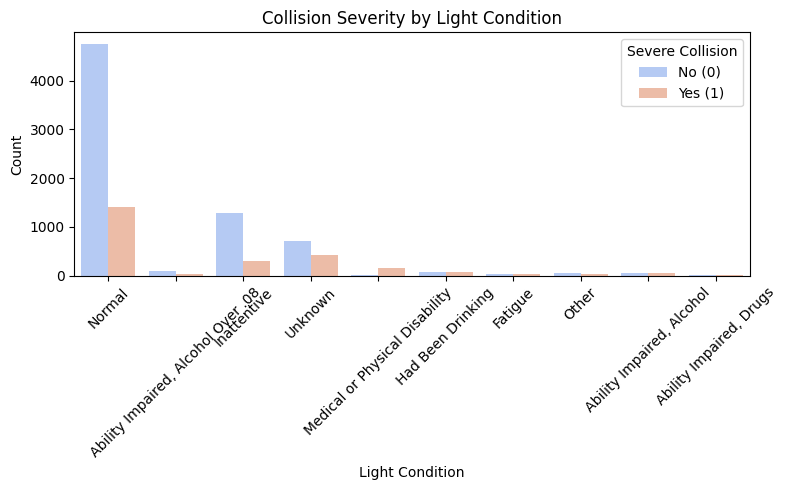

In [14]:

plt.figure(figsize=(8,5))
sns.countplot(x='DRIVCOND', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()


In [20]:
def simplify_driver_condition(cond):
    if cond == 'Normal':
        return 'Normal'
    elif cond == 'Inattentive':
        return 'Inattentive'
    elif cond == 'Fatigue':
        return 'Fatigue'
    elif cond in ['Had Been Drinking', 'Ability Impaired, Alcohol Over .08', 'Ability Impaired, Alcohol']:
        return 'Alcohol Impaired'
    elif cond == 'Ability Impaired, Drugs':
        return 'Drug Impaired'
    elif cond == 'Medical or Physical Disability':
        return 'Medical Condition'
    elif cond == 'Other':
        return 'Other'
    else:
        return 'Unknown'
df['DRIVCOND'] = df['DRIVCOND'].fillna('Normal')
df['DRIVCOND_GROUPED'] = df['DRIVCOND'].apply(simplify_driver_condition)

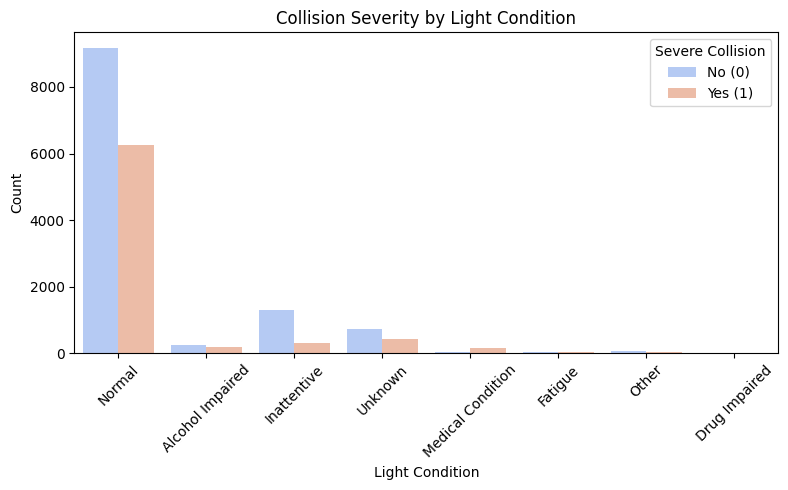

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='DRIVCOND_GROUPED', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()


In [19]:
df["DRIVCOND"].

0           NaN
1           NaN
2        Normal
3           NaN
4           NaN
          ...  
18952       NaN
18953       NaN
18954    Normal
18955    Normal
18956       NaN
Name: DRIVCOND, Length: 18957, dtype: object